<a href="https://colab.research.google.com/github/Cat0412/2024-1-my-BDA/blob/main/inclass/04w_0326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


##코랩에서 한글처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.6 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

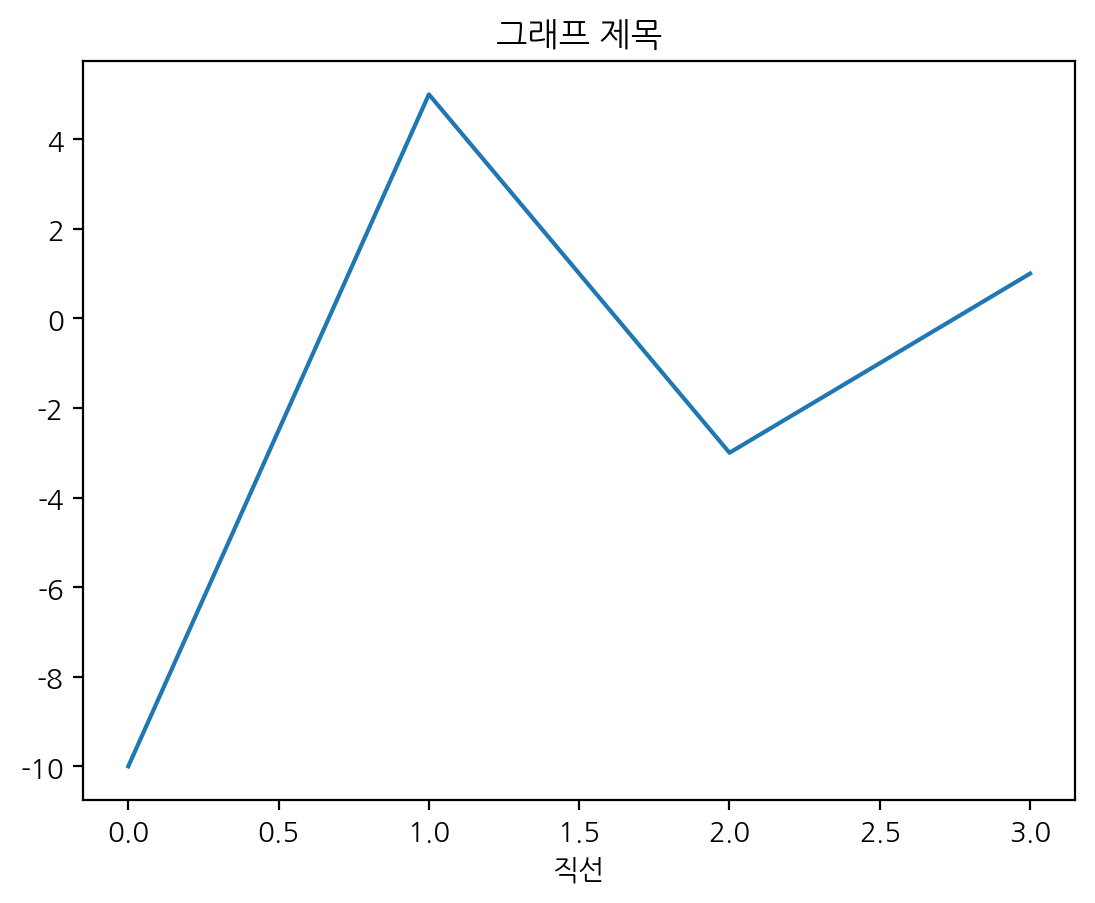

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사

In [6]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.46 MiB/s, done.


In [8]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [12]:
exam.sample(5) #random하게 샘플데이터 5개 추출

,id,nclass,math,english,science
2,3,1,45,86,78
15,16,4,58,98,65
8,9,3,20,98,15
17,18,5,80,78,90
13,14,4,48,87,12


In [32]:
exam.query('nclass == 1')#nclass(반)이 1인 행만 추출

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [34]:
#exam[조건] // 조건이란 데이터프레임[칼럼명] == 원하는값
exam[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [19]:
exam.query('math > 50')#수학점수가 50점 초과하는 행만 추출

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [22]:
#and연산자 &   or연산자 |

In [24]:
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [26]:
exam.query('(nclass == 2) & (english >= 80)')#괄호로 묶어도되고 안묶어도돼

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [27]:
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [30]:
#1,3,5반에 해당하면 추출 밑에 코드를 쓰는게 best
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [31]:
exam.query('nclass in [1,3,5]') #중간고사 시험예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [38]:
exam[exam['nclass'] in [1,3,5]] #이렇게 바로in쓸 수 없다.위의 코드를 다르게표현해보기

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [37]:
exam[exam['nclass'].isin ([1,3,5])] #.isin() 메소드를 이용해야함 중간고사예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [46]:
exam["nclass"]

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    4
13    4
14    4
15    4
16    5
17    5
18    5
19    5
Name: nclass, dtype: int64

In [51]:
print(type(exam["nclass"]))
'''list 보다 조금더 많은 정보를 갖고있다. index가 있고 그에 해당하는 value가 있다.
인덱스를 바꿀 수 있다.그게 시리즈임 Series랑 DataFrame자료형 구분하는거 중요하다 하심'''

<class 'pandas.core.series.Series'>


'list 보다 조금더 많은 정보를 갖고있다. index가 있고 그에 해당하는 value가 있다. \n인덱스를 바꿀 수 있다.그게 시리즈임 Series랑 DataFrame자료형 구분하는거 중요하다 하심'

In [47]:
exam[["nclass"]]

,nclass
0,1
1,1
2,1
3,1
4,2
5,2
6,2
7,2
8,3
9,3


In [48]:
type(exam[["nclass"]])#대괄호 두개를 쳐버리면 자료형이 시리즈가 아니라 DataFrame형이다.

pandas.core.frame.DataFrame

In [50]:
exam[['nclass', 'math']]#DataFrame 열이름으로 조회하기 중요하다

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


##추출한 행으로 데이터 만들기

In [53]:
#nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

#nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')
#얘는 쿼리로 자료를 검색한거

In [54]:
nclass1["math"].mean()

46.25

In [55]:
nclass1["math"].sum()

185

In [59]:
nclass1.math.sum()

185

In [69]:
#nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

#nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]
#얘는 .으로 조건으로 구한거 결국 똑같다.

In [58]:
#2반 과학 점수 평균 구하기 sol1
nclass2.science.mean()

58.25

In [61]:
#2반 과학 점수 평균 구하기 sol2
nclass2['science'].mean()

58.25

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [63]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [64]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


In [65]:
# 전체 조건에 큰따옴표, 추출할 문자에 작은따옴표 사용
df.query("sex == 'M' & country == 'China'")

,sex,country
1,M,China


In [66]:
# 전체 조건과 추출할 문자에 모두 작은따옴표 사용
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


### (알아 두면 좋아요) 외부 변수를 이용해 추출하기

In [67]:
var = 3
exam.query('nclass == var') #왜오류가 나는지 밑에 설명함

UndefinedVariableError: name 'var' is not defined

In [72]:
var = 3
exam.query('nclass == @var') #얘는 쿼리로 검색한것. 변수명 앞에 @를 쓰면돼

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [73]:
exam[exam.nclass == var]#얘는 .조건으로 조회한것. 위에 쿼리검색이랑 똑같아 지금 위에서부터 계속 하는짓이 두가지방식으로 값조회 하는 짓이다. 기억할것!

,id,nclass,math,english,science
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


### (알아 두면 좋아요) 파이썬에서 사용하는 기호

| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |

| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

### 메소드 df.isin() :isin (값)을 갖냐?(결과값 Bool)

In [74]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [77]:
df.isin([0])#list 나 dict형태로 매개변수넣어야함

,num_legs,num_wings
falcon,False,False
dog,False,True


In [78]:
df.isin([0, 2])#list

,num_legs,num_wings
falcon,True,True
dog,False,True


In [79]:
df.isin({'num_wings': [0, 3]})#dict 형태로 매개변수넣음

,num_legs,num_wings
falcon,False,False
dog,False,True


In [176]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                  index=['spider', 'falcon'])
other

,num_legs,num_wings
spider,8,0
falcon,3,2


In [177]:
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False


In [178]:
s = pd.Series(['llama', 'cow', 'llama', 'beetle', 'llama', 'hippo'], name='animal')
s.isin(['cow', 'llama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [180]:
~s.isin(['cow', 'llama']) #not 기호 ~써서 반대값나옴

0    False
1    False
2    False
3     True
4    False
5     True
Name: animal, dtype: bool

In [181]:
print(pd.Series([1]).isin(['1']))
print(pd.Series([1.1]).isin(['1.1']))
#숫자랑 '문자'는 당연히 다르지 False 당연한거

0    False
dtype: bool
0    False
dtype: bool


In [183]:
print(pd.Series([1]).isin([1]))
print(pd.Series([1.1]).isin([1.1]))
#숫자 = 숫자니? 당연히 True

0    True
dtype: bool
0    True
dtype: bool


###06-3 필요한 변수만 추출하기

In [122]:
exam['math']#math열 Series형태 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [82]:
exam[['math']]#math 열 DataFrame추출

,math
0,50
1,60
2,45
3,30
4,25
5,50
6,80
7,90
8,20
9,50


In [84]:
exam.math #속성

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [85]:
exam.sample(3)

,id,nclass,math,english,science
5,6,2,50,89,98
9,10,3,50,98,45
18,19,5,89,68,87


In [86]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [121]:
exam.columns[3]#indexing 으로 원하는 열넘버입력해서 열 이름을 찾을수 있다

'english'

In [89]:
exam[exam.columns[3]]#indexing 으로 대괄호 한번만감싸서(시리즈형) 3번째열의 값을 조회

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [103]:
exam[[exam.columns[3]]]#indexing 으로 대괄호 두번 감싸서(DataFrame형) 3번째열의 값을 조회

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [92]:
exam.columns[1:3] #슬라이싱해서 단순히 1,2번열 이름을 반환

Index(['nclass', 'math'], dtype='object')

In [120]:
#슬라이싱해서 1,2번열의 자료까지 가져옴
#슬라이싱해서 두개이상의 열(변수)를 가져오면 걍 무조견 데이터프레임이다.
#변수가 한개일때만 대괄호1개:시리즈, 2개:데이터프레임 인거다
#밑에 코드결과는 두개의 열을 슬라이싱했으니 무조건 데이터프레임형태로 출력됨
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [96]:
exam[['nclass', 'math', 'english']] #여러변수 추출하기

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


###행과 변수(열) 제거하기 중요

In [98]:
exam.sample(3)

,id,nclass,math,english,science
12,13,4,46,98,65
1,2,1,60,97,60
14,15,4,75,56,78


In [99]:
exam.drop(1)#1번 인덱스를 삭제함

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [102]:
exam.drop([1,5])#두개이상의 인덱스넘버(행)을 삭제하려면 리스트형태로 넣어야함

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [106]:
exam.drop(labels = [1,5])#위의 코드랑 걍 똑같음 labels없어도돼

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [107]:
exam.drop(labels = [1,5],axis = 0) #위의 코드랑 똑같다고!!

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [105]:
exam.drop(1,axis=0)#axis = 0 은 행을의미한다. 기본설정이라 안써도 된다.

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [109]:
 #axis = 1은 칼럼을 삭제한다는것임.
exam.drop(labels = "nclass", axis = 1)

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [110]:
exam.drop("nclass", axis = 1) #labels는 없어도돼

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [112]:
 #여러 열 삭제 (리스트형태로 넣어야돼 리스트를 참 좋아해 파이썬은)
exam.drop(["nclass","english"], axis = 1)

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


In [ ]:
#더 간단한 코드도 있다
exam.drop(index = 3)#이건 행넘버인 index 삭제

In [115]:
#더 간단한 코드도 있다
exam.drop(columns = "math")#columns로 쓰면 열 삭제!!

,id,nclass,english,science
0,1,1,98,50
1,2,1,97,60
2,3,1,86,78
3,4,1,98,58
4,5,2,80,65
5,6,2,89,98
6,7,2,90,45
7,8,2,78,25
8,9,3,98,15
9,10,3,98,45


In [118]:
#여러 칼럼 삭제하기 무조건 리스트형태야!!!
exam.drop(columns = ["math", "science"])

,id,nclass,english
0,1,1,98
1,2,1,97
2,3,1,86
3,4,1,98
4,5,2,80
5,6,2,89
6,7,2,90
7,8,2,78
8,9,3,98
9,10,3,98


### pandas함수 조합하기

In [123]:
#nclass가 1인 행만 추출한 다음 english추출
exam.query('nclass == 1')['english']

0    98
1    97
2    86
3    98
Name: english, dtype: int64

In [126]:
#위에랑 똑같은데 얘는대괄호 2번감싸서 데이타프레임형태
exam.query('nclass == 1')[['english']]

,english
0,98
1,97
2,86
3,98


In [127]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
# 왜 오류가 나는지 밑의 코드 참고
exam.query('math >= 50')['id', 'math']

KeyError: ('id', 'math')

In [129]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
# 시리즈가아니라 데이터프레임으로 출력해야한다.대괄호2번.그래야오류가 없어.
exam.query('math >= 50')[['id', 'math']]

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [130]:
exam.query('math >= 50')[['id', 'math']].head(3)

,id,math
0,1,50
1,2,60
5,6,50


In [131]:
exam.query('math >= 50')[['id', 'math']].sample(3)

,id,math
10,11,65
1,2,60
15,16,58


In [133]:
exam.query('math >= 50')[['id', 'math']].tail(3)

,id,math
17,18,80
18,19,89
19,20,78


In [135]:
exam.query('math >= 50')[['id', 'math']].sample(frac = .4)

,id,math
16,17,65
18,19,89
10,11,65
17,18,80
14,15,75


### 가독성 있게 코드 줄 바꾸기

In [137]:
#math가 50 이상인 행만 추출
#id,math 추출
#앞부분 10행 추출

In [136]:
exam.query('math >= 50')[['id', 'math']].head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [138]:
exam.query('math >= 50') \
 [['id', 'math']] \
 .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


## 06-4 순서대로 정렬하기

### 오름차순으로 정렬하기

In [140]:
# math기준 오름차순 정렬
# 아무조건안주면 오름차순이 기본이다.내려가는거보단 올라가는게 좋잖아;;
exam.sort_values("math")

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


### 내림차순으로 정렬하기

In [141]:
# math 내림차순 정렬
# 내림차순은 ascending = False라는 매개변수설정을 해줘야함
exam.sort_values('math', ascending = False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


### 여러 정렬 기준 적용하기

In [142]:
# nclass, math 오름차순 정렬
# 우선 nclass기준으로 정렬하고 nclass가 같을때 math별로 정렬
# 정렬순위 nclass1순위, math가 2순위가 되는것
# 무조건 여러개의 변수를 인자로 넣을땐 list형태로!!파이썬 기본 그냥 리스트!
# 아무 설정 안주면 오름차순이 기본세팅값
exam.sort_values(['nclass', 'math'])

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [143]:
# nclass 오름차순, math 내림차순 정렬
# ['nclass','math'] [True,False] 순서 맞춰서 넣어주면 된다.
exam.sort_values(['nclass', 'math'], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


## 06-5 파생변수 추가하기

In [ ]:
#파생변수 추가할때 assign메소드를 이용한다.

In [144]:
#total 변수 추가
#total은 ''로 감싸지 않는다. 당연한거다 사실
#a = 2 + 3이지 'a' = 2 + 3 이 아님
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [145]:
exam.sample(2) #assign한다고해서 dataframe원본에 반영되지 않는다.

,id,nclass,math,english,science
10,11,3,65,65,65
3,4,1,30,98,58


In [147]:
# total 변수 추가
# 이전시간에 배운 파생변수추가하기를 이용하면 반영이 된다.
exam['total'] = exam['math'] + exam['english'] + exam['science']
exam.sample(2)

,id,nclass,math,english,science,total
4,5,2,25,80,65,170
10,11,3,65,65,65,195


#### 여러 파생변수 한 번에 추가하기

In [152]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [153]:
#이것또한 역시 assign메서드를 이용했기에 반영되지 않음
exam.sample(2)

,id,nclass,math,english,science,total
2,3,1,45,86,78,209
6,7,2,80,90,45,215


### `df.assign()`에 `np.where()` 적용하기

In [155]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')

In [156]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fall
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fall
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fall
7,8,2,90,78,25,fall
8,9,3,20,98,15,fall
9,10,3,50,98,45,fall


### 추가한 변수를 `pandas` 함수에 바로 활용하기


In [157]:
# total 변수 추가함과 동시에
# total 기준 정렬(기본오름차순)
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


### `lambda` 이용해 데이터 프레임명 줄여 쓰기


In [158]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('data/exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [162]:
(lambda x, y : x + y)(10,20)
#lambda x 에 10을 y 에 20을 넣겠다는 의미

30

In [163]:
fn = lambda x, y : x + y
fn(10,20)

30

In [159]:
# long_name 대신 x 입력 패키지로드할때 pandas as pd같은 느낌이다.
#lambda x:
#lamnda y:뭐 아무거나 써라
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


#### 앞에서 만든 변수를 활용해 다시 변수 만들기

In [164]:
exam = pd.read_csv('data/exam.csv')

In [167]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: round(x['total'] / 3, 2))
#round(반올림할값,소수자릿수까지)
#여기서x 는 exam 데이터프레임을 의미하고 새로운 파생변수인 total을 바로 연산에 사용가능

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [169]:
data = 1.1234567
round(data,2)

1.12

In [171]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean  = lambda x: x['total'] / 3)
#소수 6자리까지나옴

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [172]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3)
#하나의 괄호안에서 새로만든 파생변수로 다시 파생변수를 만들때는
#무조건 lambda약어를 사용해야 오류가 안난다.

KeyError: 'total'

### 정리하기

In [173]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')
exam[exam['nclass'].isin ([1,3,5])] #.쿼리함수 조회가 아닐땐 in이 아니라
                                    #.isin() 메소드를 이용해야함 중간고사예상

## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출(list필수)
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거(list필수)


## 3. pandas 명령어 조합하기(그냥 이어서 갖다 붙히면 된다)
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
